In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
import seaborn as sns
sns.set()

In [3]:
path="Scop2_Merged_Electricity_Summarized_Weather_data.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,City,Date,EB Units in kWh,EB Units in wH,Total EB Cost in INR,Private Power Purchase Units in kWh,Total Private Power Purchased Cost in INR,Green RE Units in kWh,Inhouse Roof top Solar consumption in kWh,DG Units in kWh,...,temperature_2m_min,wind_speed_10m_mean,cloud_cover_mean,shortwave_radiation_sum,precipitation_sum,dew_point_2m_mean,pressure_msl_mean,soil_moisture_0_to_10cm_mean,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean
0,Bangalore City,4/1/2016,1105550.0,1.105550e+09,0.0,5955000.0,0.0,5955000.0,0.0,677196.0,...,21.635786,6.761642,47.476090,23.222060,55.773994,16.392437,1010.45465,0.289046,5.949068,54.008373
1,Bangalore City,5/1/2016,1627930.0,1.627930e+09,0.0,5980000.0,0.0,5980000.0,0.0,414421.0,...,21.020254,8.547977,34.940670,22.972004,189.875270,20.807505,1009.96985,0.355804,5.464076,76.418686
2,Bangalore City,6/1/2016,591660.0,5.916600e+08,0.0,6369200.0,0.0,6369200.0,0.0,377424.0,...,20.237425,13.925488,73.382904,16.059826,225.510470,20.620766,1008.24005,0.465095,3.485919,87.412315
3,Bangalore City,7/1/2016,760485.0,7.604850e+08,0.0,6150000.0,0.0,6150000.0,0.0,200585.0,...,19.735310,13.168531,81.152610,14.844147,73.836250,19.835386,1008.61480,0.394364,3.336013,83.811410
4,Bangalore City,8/1/2016,680655.0,6.806550e+08,0.0,5870000.0,0.0,5870000.0,0.0,215702.0,...,20.125814,8.672108,76.970085,18.555687,182.488450,20.889835,1009.72955,0.437334,4.353626,85.211480


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   City                                          1400 non-null   object 
 1   Date                                          1400 non-null   object 
 2   EB Units in kWh                               1400 non-null   float64
 3   EB Units in wH                                1400 non-null   float64
 4   Total EB Cost in INR                          1400 non-null   float64
 5   Private Power Purchase Units in kWh           1400 non-null   float64
 6   Total Private Power Purchased Cost in INR     1400 non-null   float64
 7   Green RE Units in kWh                         1400 non-null   float64
 8   Inhouse Roof top Solar consumption in kWh     1400 non-null   float64
 9   DG Units in kWh                               1400 non-null   f

In [147]:
# Convert 'Date' column to datetime format (if not already done)
df['Date'] = pd.to_datetime(df['Date'])


In [148]:
Column_to_use=['City','Date','Total Units (kWh)','No of Employees','No of Seats','Sft Served','temperature_2m_mean', 'Unique Site Count',
               'Percentage Occupancy','temperature_2m_max','temperature_2m_min','wind_speed_10m_mean','cloud_cover_mean','shortwave_radiation_sum','precipitation_sum',
               'dew_point_2m_mean','pressure_msl_mean','soil_moisture_0_to_10cm_mean','et0_fao_evapotranspiration_sum','relative_humidity_2m_mean']

new_data = df[Column_to_use]

In [149]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   City                            1400 non-null   object        
 1   Date                            1400 non-null   datetime64[ns]
 2   Total Units (kWh)               1400 non-null   float64       
 3   No of Employees                 1400 non-null   float64       
 4   No of Seats                     1400 non-null   float64       
 5   Sft Served                      1400 non-null   float64       
 6   temperature_2m_mean             1400 non-null   float64       
 7   Unique Site Count               1400 non-null   int64         
 8   Percentage Occupancy            1400 non-null   float64       
 9   temperature_2m_max              1400 non-null   float64       
 10  temperature_2m_min              1400 non-null   float64       
 11  wind

In [150]:
new_data.head()

,City,Date,Total Units (kWh),No of Employees,No of Seats,Sft Served,temperature_2m_mean,Unique Site Count,Percentage Occupancy,temperature_2m_max,temperature_2m_min,wind_speed_10m_mean,cloud_cover_mean,shortwave_radiation_sum,precipitation_sum,dew_point_2m_mean,pressure_msl_mean,soil_moisture_0_to_10cm_mean,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean
0,Bangalore City,2016-04-01,13692746.0000,0.0000,0.0000,0.0000,27.2319,8,0.0000,32.9038,21.6358,6.7616,47.4761,23.2221,55.7740,16.3924,1010.4547,0.2890,5.9491,54.0084
1,Bangalore City,2016-05-01,14002351.0000,0.0000,0.0000,0.0000,25.1150,8,0.0000,30.0692,21.0203,8.5480,34.9407,22.9720,189.8753,20.8075,1009.9698,0.3558,5.4641,76.4187
2,Bangalore City,2016-06-01,13707484.0000,0.0000,0.0000,0.0000,22.5498,8,0.0000,25.4830,20.2374,13.9255,73.3829,16.0598,225.5105,20.6208,1008.2400,0.4651,3.4859,87.4123
3,Bangalore City,2016-07-01,13261070.0000,0.0000,0.0000,0.0000,22.2382,8,0.0000,25.8035,19.7353,13.1685,81.1526,14.8441,73.8363,19.8354,1008.6148,0.3944,3.3360,83.8114
4,Bangalore City,2016-08-01,12636357.0000,0.0000,0.0000,0.0000,22.8988,8,0.0000,27.0156,20.1258,8.6721,76.9701,18.5557,182.4885,20.8898,1009.7296,0.4373,4.3536,85.2115


#Data Standardization

In [151]:
# Top 10 cites by the Total Units (kWh)
top_10_cities = new_data.groupby('City')['Total Units (kWh)'].sum().sort_values(ascending=False).reset_index()

pd.set_option('display.float_format', '{:,.0f}'.format)

top_10_cities.head(10)

,City,Total Units (kWh)
0,Bangalore City,"817,739,933"
1,Chennai City,"404,046,429"
2,Hyderabad City,"234,242,531"
3,Pune,"229,398,372"
4,Noida City,"106,047,557"
5,Kolkata City,"104,177,829"
6,Cochin (Kochi) City,"60,561,423"
7,Mumbai City,"50,834,271"
8,Mysore City,"37,504,587"
9,Coimbatore City,"22,036,249"


In [152]:
top_10_cities_names=top_10_cities.City[:10]
top_10_cities_names

0         Bangalore City
1           Chennai City
2         Hyderabad City
3                   Pune
4             Noida City
5           Kolkata City
6    Cochin (Kochi) City
7            Mumbai City
8            Mysore City
9        Coimbatore City
Name: City, dtype: object

In [153]:
#Let's handle the condition of zero values in the target variable.

new_data['Total Units (kWh)'] = new_data['Total Units (kWh)'].apply(lambda x: x + 1 if x == 0 else x)

#Data Standardization

In [154]:
# normalized the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Scaling the data, excluding 'Date', 'City', 'lat', 'long'
scaled = scaler.fit_transform(new_data[['No of Employees','No of Seats','Sft Served', 
                                       'temperature_2m_mean', 'Percentage Occupancy', 
                                       'temperature_2m_max', 'temperature_2m_min', 
                                       'wind_speed_10m_mean','cloud_cover_mean', 
                                       'shortwave_radiation_sum', 'precipitation_sum', 
                                       'dew_point_2m_mean', 'pressure_msl_mean', 
                                       'soil_moisture_0_to_10cm_mean', 'et0_fao_evapotranspiration_sum', 
                                       'relative_humidity_2m_mean']])

# create datefrane for scaled data
new_data[['No of Employees','No of Seats','Sft Served','temperature_2m_mean', 'Percentage Occupancy', 
          'temperature_2m_max', 'temperature_2m_min', 'wind_speed_10m_mean','cloud_cover_mean', 
          'shortwave_radiation_sum', 'precipitation_sum', 'dew_point_2m_mean', 'pressure_msl_mean', 
          'soil_moisture_0_to_10cm_mean', 'et0_fao_evapotranspiration_sum','relative_humidity_2m_mean']] = pd.DataFrame(data=scaled)

# Display scaled data with more precision (decimal points)
pd.options.display.float_format = '{:.4f}'.format
new_data.tail()

,City,Date,Total Units (kWh),No of Employees,No of Seats,Sft Served,temperature_2m_mean,Unique Site Count,Percentage Occupancy,temperature_2m_max,temperature_2m_min,wind_speed_10m_mean,cloud_cover_mean,shortwave_radiation_sum,precipitation_sum,dew_point_2m_mean,pressure_msl_mean,soil_moisture_0_to_10cm_mean,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean
1395,Vizag City,2024-03-01,89134.0000,0.0064,0.0035,0.0216,0.5539,1,0.0239,0.4265,0.6904,0.3405,0.1822,0.6833,0.0225,0.8359,0.6277,0.2274,0.4919,0.8198
1396,Vizag City,2024-04-01,98395.1000,0.0079,0.0035,0.0216,0.6457,1,0.0296,0.5451,0.7945,0.5346,0.1518,0.8274,0.0045,0.9047,0.6328,0.1288,0.6129,0.7405
1397,Vizag City,2024-05-01,94357.9000,0.0089,0.0035,0.0216,0.7622,1,0.0336,0.6918,0.9024,0.6306,0.1741,0.8188,0.0042,0.9519,0.3492,0.0904,0.6627,0.6269
1398,Vizag City,2024-06-01,87497.3000,0.0088,0.0035,0.0216,0.6457,1,0.0329,0.4854,0.8337,0.6354,0.7142,0.4468,0.0477,0.9268,0.2813,0.2401,0.3662,0.7984
1399,Vizag City,2024-07-01,97014.7000,0.0087,0.0035,0.0216,0.6162,1,0.0328,0.4556,0.8038,0.5814,0.4961,0.4715,0.0775,0.9211,0.2967,0.4634,0.3801,0.8383


In [155]:
#Let's just move the last one year of data to test dataset and use the rest as training dataset. 

new_data_train = new_data[new_data['Date'] <= '2023-05-01']
new_data_test = new_data[new_data['Date'] > '2023-05-01']



In [156]:
new_data_test

,City,Date,Total Units (kWh),No of Employees,No of Seats,Sft Served,temperature_2m_mean,Unique Site Count,Percentage Occupancy,temperature_2m_max,temperature_2m_min,wind_speed_10m_mean,cloud_cover_mean,shortwave_radiation_sum,precipitation_sum,dew_point_2m_mean,pressure_msl_mean,soil_moisture_0_to_10cm_mean,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean
86,Bangalore City,2023-06-01,6615402.0000,0.1786,0.1544,1.0000,0.4708,7,0.1413,0.4187,0.5868,0.6840,0.6365,0.5391,0.0372,0.7334,0.6014,0.6257,0.3673,0.7395
87,Bangalore City,2023-07-01,6593446.0000,0.1851,0.1544,1.0000,0.4752,7,0.1408,0.4561,0.5604,0.5670,0.7799,0.5140,0.0188,0.6729,0.6482,0.6194,0.3857,0.6350
88,Bangalore City,2023-08-01,6769602.0000,0.1841,0.1544,1.0000,0.4328,7,0.1416,0.3808,0.5448,0.3430,0.7882,0.5165,0.0521,0.7316,0.6285,0.6796,0.3740,0.8027
89,Bangalore City,2023-09-01,6441802.6400,1.0000,0.1488,0.8938,0.4494,7,0.5160,0.3902,0.5744,0.1499,0.6956,0.6778,0.0557,0.7567,0.7513,0.7584,0.5040,0.8090
90,Bangalore City,2023-10-01,6702163.0000,0.1759,0.1488,1.0000,0.4251,7,0.1393,0.3617,0.5443,0.2184,0.6370,0.4957,0.0516,0.7262,0.7373,0.7081,0.3487,0.8130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,Vizag City,2024-03-01,89134.0000,0.0064,0.0035,0.0216,0.5539,1,0.0239,0.4265,0.6904,0.3405,0.1822,0.6833,0.0225,0.8359,0.6277,0.2274,0.4919,0.8198
1396,Vizag City,2024-04-01,98395.1000,0.0079,0.0035,0.0216,0.6457,1,0.0296,0.5451,0.7945,0.5346,0.1518,0.8274,0.0045,0.9047,0.6328,0.1288,0.6129,0.7405
1397,Vizag City,2024-05-01,94357.9000,0.0089,0.0035,0.0216,0.7622,1,0.0336,0.6918,0.9024,0.6306,0.1741,0.8188,0.0042,0.9519,0.3492,0.0904,0.6627,0.6269
1398,Vizag City,2024-06-01,87497.3000,0.0088,0.0035,0.0216,0.6457,1,0.0329,0.4854,0.8337,0.6354,0.7142,0.4468,0.0477,0.9268,0.2813,0.2401,0.3662,0.7984


In [157]:

x_train =new_data_train.drop(columns=['Total Units (kWh)'])
y_train =np.log(new_data_train[["Total Units (kWh)"]])

x_test =new_data_test.drop(columns=['Total Units (kWh)'])
y_test =np.log(new_data_test[["Total Units (kWh)"]])


In [158]:
y_train

,Total Units (kWh)
0,16.4324
1,16.4547
2,16.4335
3,16.4003
4,16.3521
...,...
1381,11.3604
1382,11.3810
1383,11.5063
1384,11.6581


#Data Preprocessing

In [159]:
encoder = LabelEncoder()

x_train['City2']= encoder.fit_transform(x_train['City'])
x_test['City2']= encoder.fit_transform(x_test['City'])


In [160]:
x_train.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,1219,2019-08-23 11:14:31.205906432,2016-04-01 00:00:00,2017-11-01 00:00:00,2019-08-01 00:00:00,2021-06-01 00:00:00,2023-05-01 00:00:00,NaN
No of Employees,1219.0000,0.0727,0.0000,0.0000,0.0056,0.0654,0.7427,0.1405
No of Seats,1219.0000,0.0216,0.0000,0.0000,0.0058,0.0190,1.0000,0.0451
Sft Served,1219.0000,0.0974,0.0000,0.0000,0.0182,0.0959,1.0000,0.1726
temperature_2m_mean,1219.0000,0.5372,0.0000,0.4497,0.5465,0.6244,1.0000,0.1400
Unique Site Count,1219.0000,2.2313,1.0000,1.0000,2.0000,2.0000,8.0000,1.7544
Percentage Occupancy,1219.0000,0.0623,0.0000,0.0000,0.0162,0.0820,1.0000,0.1030
temperature_2m_max,1219.0000,0.4842,0.0000,0.3883,0.4682,0.5726,1.0000,0.1454
temperature_2m_min,1219.0000,0.6263,0.0000,0.5348,0.6443,0.7585,1.0000,0.1693
wind_speed_10m_mean,1219.0000,0.3388,0.0000,0.1995,0.3011,0.4345,1.0000,0.1915


In [20]:
x_train.to_csv("testfor-infx_train.csv")

In [161]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_neighbors': range(2,5,1)}

knn = KNeighborsRegressor()

#knn.fit(x_train.drop(columns=['City','Date']), y_train)


cv_val = 5 #setting cross validation
    

grid_search = GridSearchCV(knn, param_grid, cv=cv_val, n_jobs=-1)

grid_search.fit(x_train.drop(columns=['City','Date']), y_train)

print(grid_search.best_params_)


{'n_neighbors': 4}


In [162]:

mdl_best = grid_search.best_estimator_

y_pred = mdl_best.predict(x_test.drop(columns=['City','Date']))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1.5162626212264751


In [163]:
x_test['City']

86      Bangalore City
87      Bangalore City
88      Bangalore City
89      Bangalore City
90      Bangalore City
             ...      
1395        Vizag City
1396        Vizag City
1397        Vizag City
1398        Vizag City
1399        Vizag City
Name: City, Length: 181, dtype: object

In [164]:
np.exp(y_pred)

array([[6.24773814e+06],
       [6.24773814e+06],
       [5.73347548e+06],
       [7.84883966e+06],
       [5.63485887e+06],
       [5.57193025e+06],
       [5.22373268e+06],
       [4.55620133e+06],
       [5.56725439e+06],
       [5.93912778e+06],
       [5.92781482e+06],
       [6.10043499e+06],
       [6.24773814e+06],
       [5.79209044e+06],
       [5.80904342e+06],
       [1.42887218e+05],
       [1.68739876e+05],
       [1.75172099e+05],
       [1.55487526e+05],
       [1.15380629e+05],
       [1.18029929e+05],
       [9.39386778e+04],
       [9.69374097e+04],
       [1.05727019e+05],
       [1.39272294e+05],
       [1.69432424e+05],
       [1.46337127e+05],
       [9.35982620e+04],
       [1.42639008e+05],
       [1.42817723e+05],
       [2.70739016e+06],
       [2.99074763e+06],
       [2.99074763e+06],
       [2.97285846e+06],
       [1.69797282e+05],
       [1.71172608e+05],
       [1.70759783e+05],
       [1.74479007e+05],
       [1.85570418e+05],
       [1.85570418e+05],


In [165]:
def plot_results(y_test, y_pred, city_arr, date_arr):

#Remember here that y_test is a dataframe and y_pred is a np array
    series1 = np.exp(y_test)
    series2 = np.exp(y_pred.flatten())
    series3 = city_arr
    series4 = date_arr


    test_df = pd.DataFrame({'Actuals':series1, 'Forecasted':series2, 'City':series3, 'Date':series4})
    
    #Now plot the scatter for actuals vs forecasted
    plot_act_vs_fcst(test_df)
    
    #Now for the line charts by city
    plot_by_city(test_df)
    
def plot_act_vs_fcst(test_df):
    plt.figure(figsize=(10, 6))

    # Scatter plot
    #df =
    ax = sns.scatterplot(x='Actuals', y='Forecasted', data=test_df, hue='City')
    #sns.lineplot(x=[df['actual'].min(), df['actual'].max()], y=[df['actual'].min(), df['actual'].max()], color='red')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.plot([0, test_df["Actuals"].max()], 
             [0, test_df["Actuals"].max()], color="red", linestyle="--")
    plt.title('Actual vs Forecasted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Forecasted Values')
    plt.show()
    
def plot_data(df, value):
    """Plots data based on the unique value."""
    subset = df[df['City'] == value]
    # Replace 'x_column' and 'y_column' with actual column names
    #plt.plot(subset['x_column'], subset['y_column'])
    plt.plot(subset['Date'].to_numpy(), subset['Actuals'].to_numpy(), label='Actuals', marker='o')
    plt.plot(subset['Date'].to_numpy(), subset['Forecasted'].to_numpy(), label='Forecasted', marker='x')
    plt.xlabel('Month')
    plt.ylabel('Value')
    plt.title(f'Actual vs Forecasted Values Plot for {value}')
    
import math

def plot_by_city(test_df):
    
    unique_values = test_df['City'].unique()

    num_plots = len(unique_values)
    cols = 2  #display columns
    rows = math.ceil(num_plots/cols)

    fig, axes = plt.subplots(rows, cols, figsize=(30, 60))
    axes = axes.ravel()  # Flatten the axes array

    # Iterate through unique values and plot
    for i, value in enumerate(unique_values):
        plt.sca(axes[i])
        plot_data(test_df, value)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


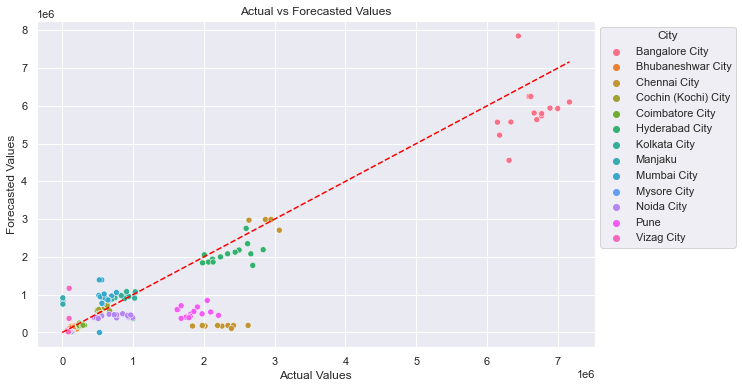

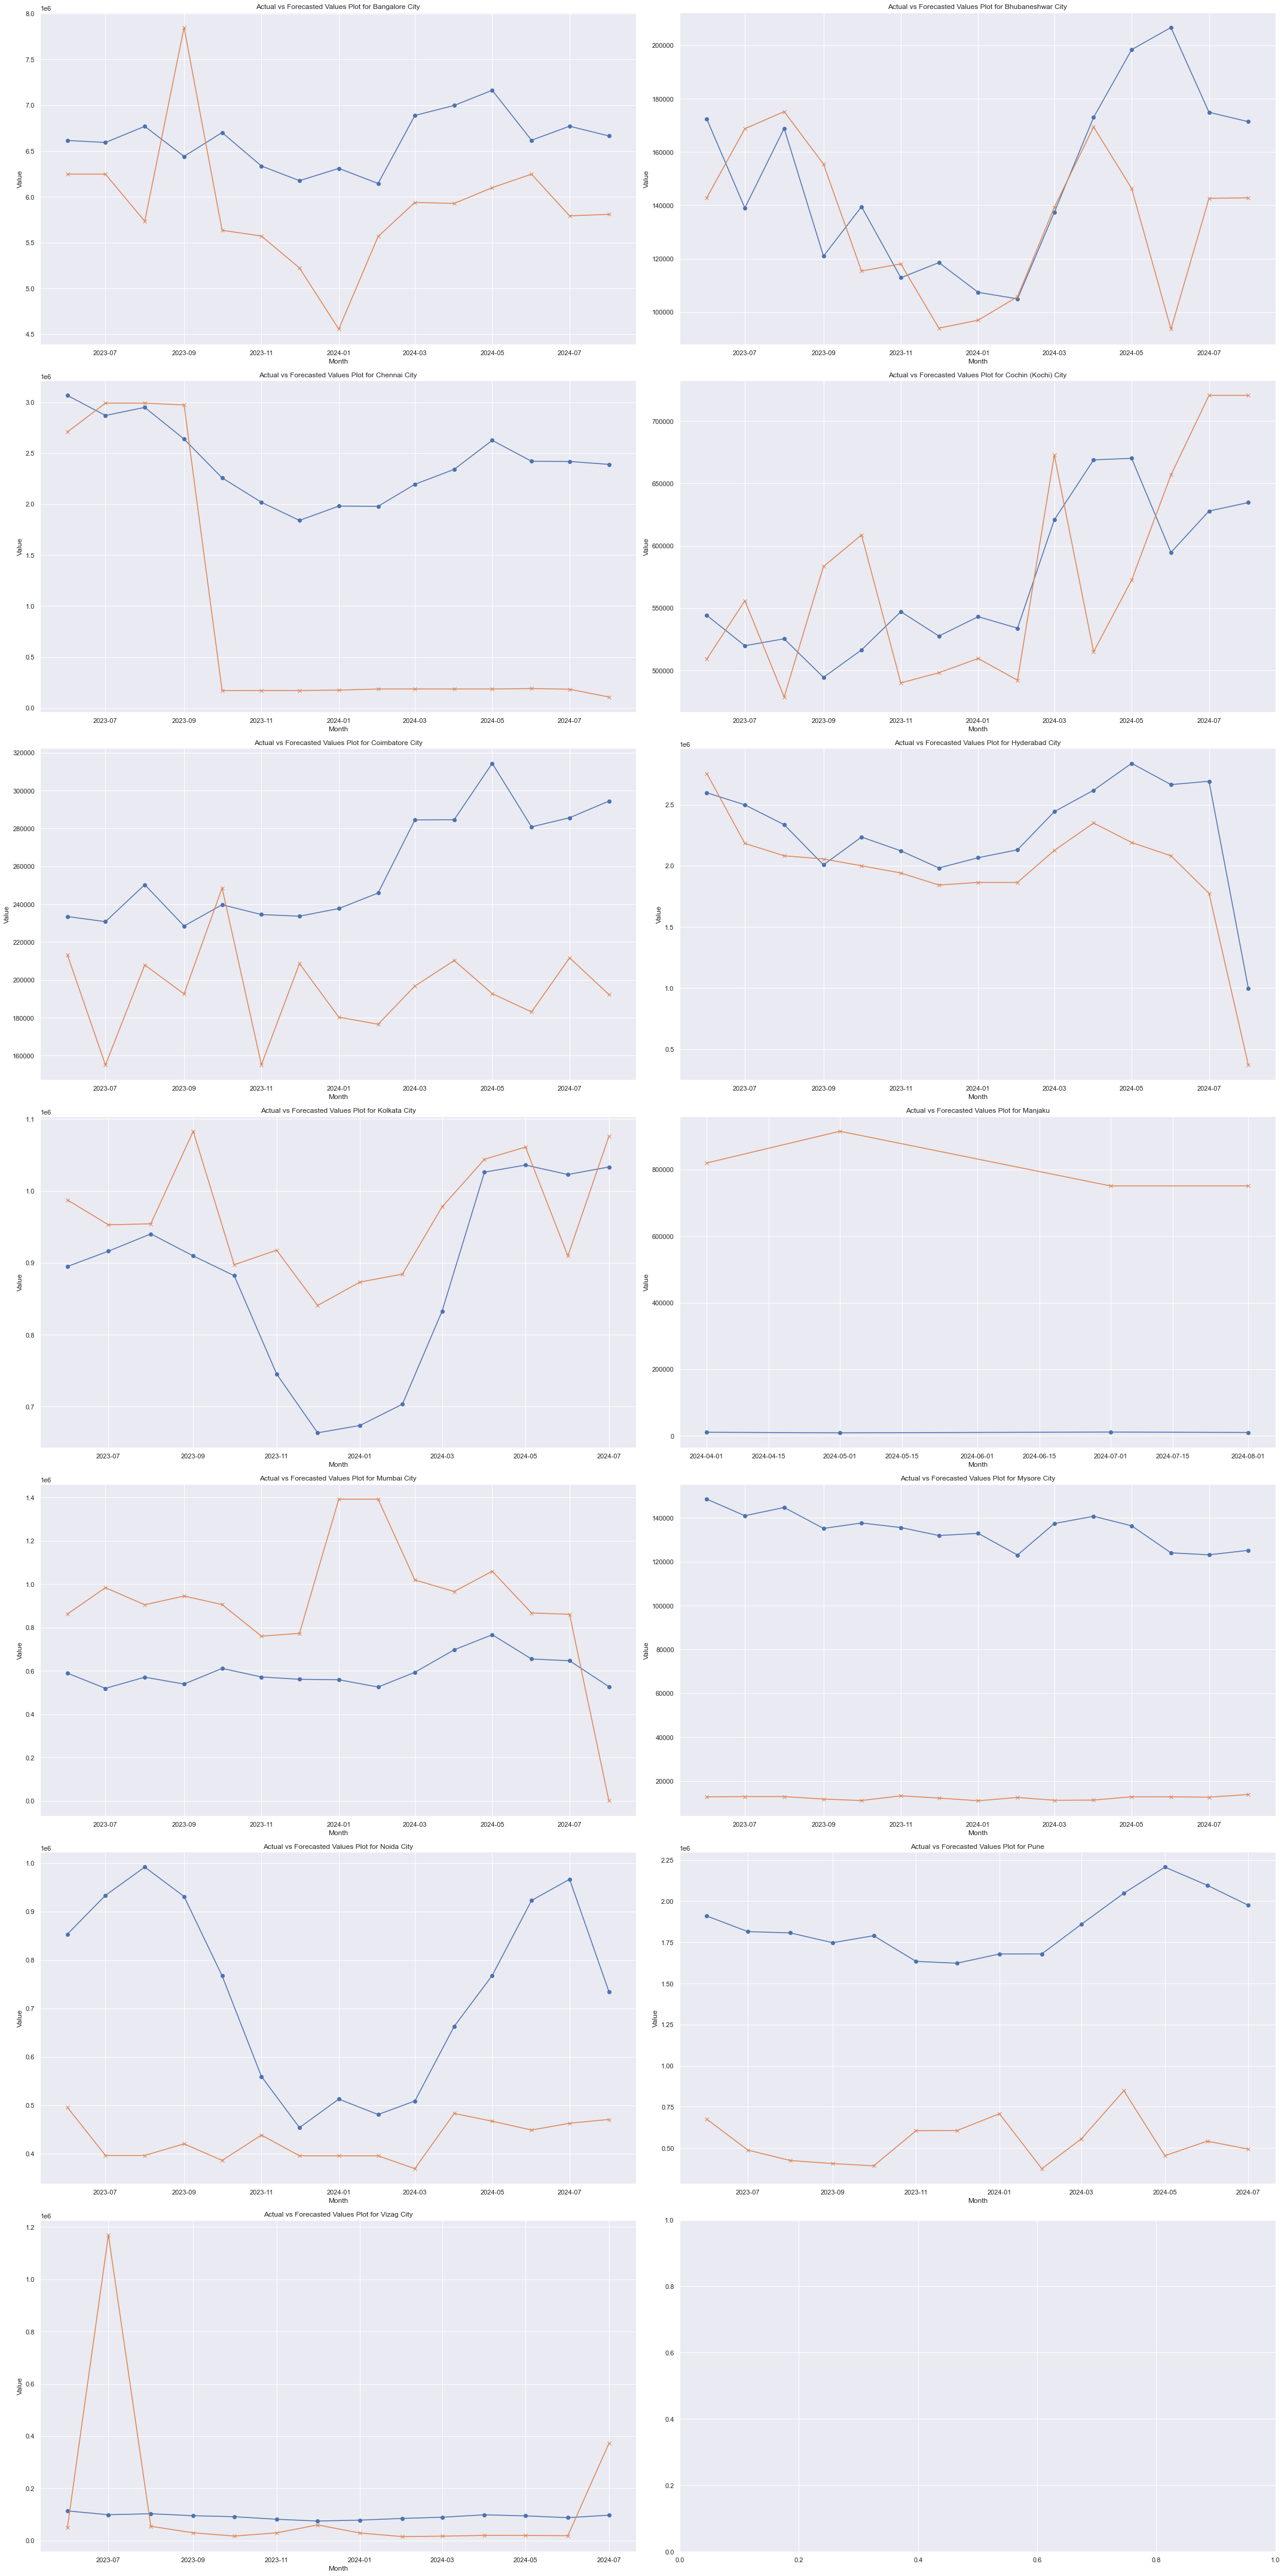

In [166]:
#Now let us plot the results 

plot_results(y_test['Total Units (kWh)'], y_pred, x_test['City'], x_test['Date'])

In [167]:
series1 = np.exp(y_test['Total Units (kWh)'])
series2 = np.exp(y_pred.flatten())
series3 = x_test['City']
series4 = x_test['Date']

pd.DataFrame({'Actuals':series1, 'Forecasted':series2, 'City':series3, 'Date':series4}).to_csv("TempKNN.csv")


In [83]:
import lightgbm as lgb

model = lgb.LGBMRegressor(random_state=42, num_leaves=25, force_col_wise = True)

param_grid = {
        'n_estimators': [5,10,20],
        'learning_rate': [0.1, 0.01, 0.05, 0.2],
        'max_depth': [5,10,15]
        }

cv_val = 5 #setting cross validation
    

grid_search = GridSearchCV(model, param_grid, cv=cv_val, n_jobs=-1)

grid_search.fit(x_train.drop(columns=['City','Date']), y_train)

print(grid_search.best_params_)

#model.fit(x_train.drop(columns=['City','Date']), y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 3756
[LightGBM] [Info] Number of data points in the train set: 1219, number of used features: 18
[LightGBM] [Info] Start training from score 12.983632
{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 10}


In [84]:

mdl_best = grid_search.best_estimator_

y_pred = mdl_best.predict(x_test.drop(columns=['City','Date']))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1.3372083653874196


In [85]:
np.exp(y_pred)

array([553777.79085585, 553777.79085585, 553777.79085585, 553777.79085585,
       553777.79085585, 553777.79085585, 553777.79085585, 553777.79085585,
       553777.79085585, 553777.79085585, 553777.79085585, 553777.79085585,
       553777.79085585, 553777.79085585, 553777.79085585, 386670.55979476,
       386670.55979476, 386670.55979476, 386670.55979476, 386670.55979476,
       386670.55979476, 386670.55979476, 386670.55979476, 386670.55979476,
       386670.55979476, 386670.55979476, 386670.55979476, 386670.55979476,
       386670.55979476, 386670.55979476, 513037.43353994, 410491.25883631,
       410491.25883631, 410491.25883631, 410491.25883631, 410491.25883631,
       410491.25883631, 410491.25883631, 410491.25883631, 410491.25883631,
       410491.25883631, 410491.25883631, 410491.25883631, 410491.25883631,
       386670.55979476, 447757.71965057, 447757.71965057, 447757.71965057,
       447757.71965057, 447757.71965057, 447757.71965057, 447757.71965057,
       447757.71965057, 4

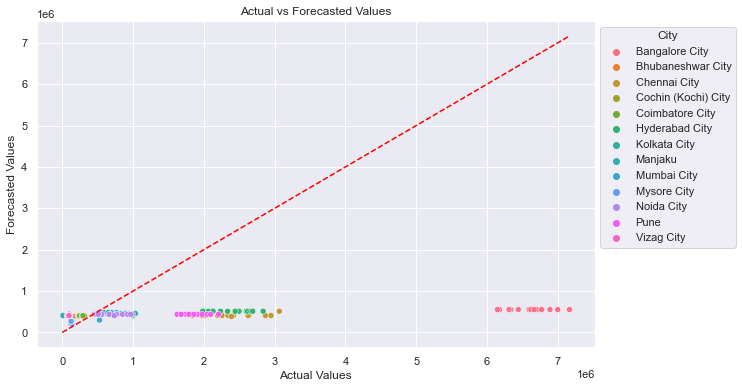

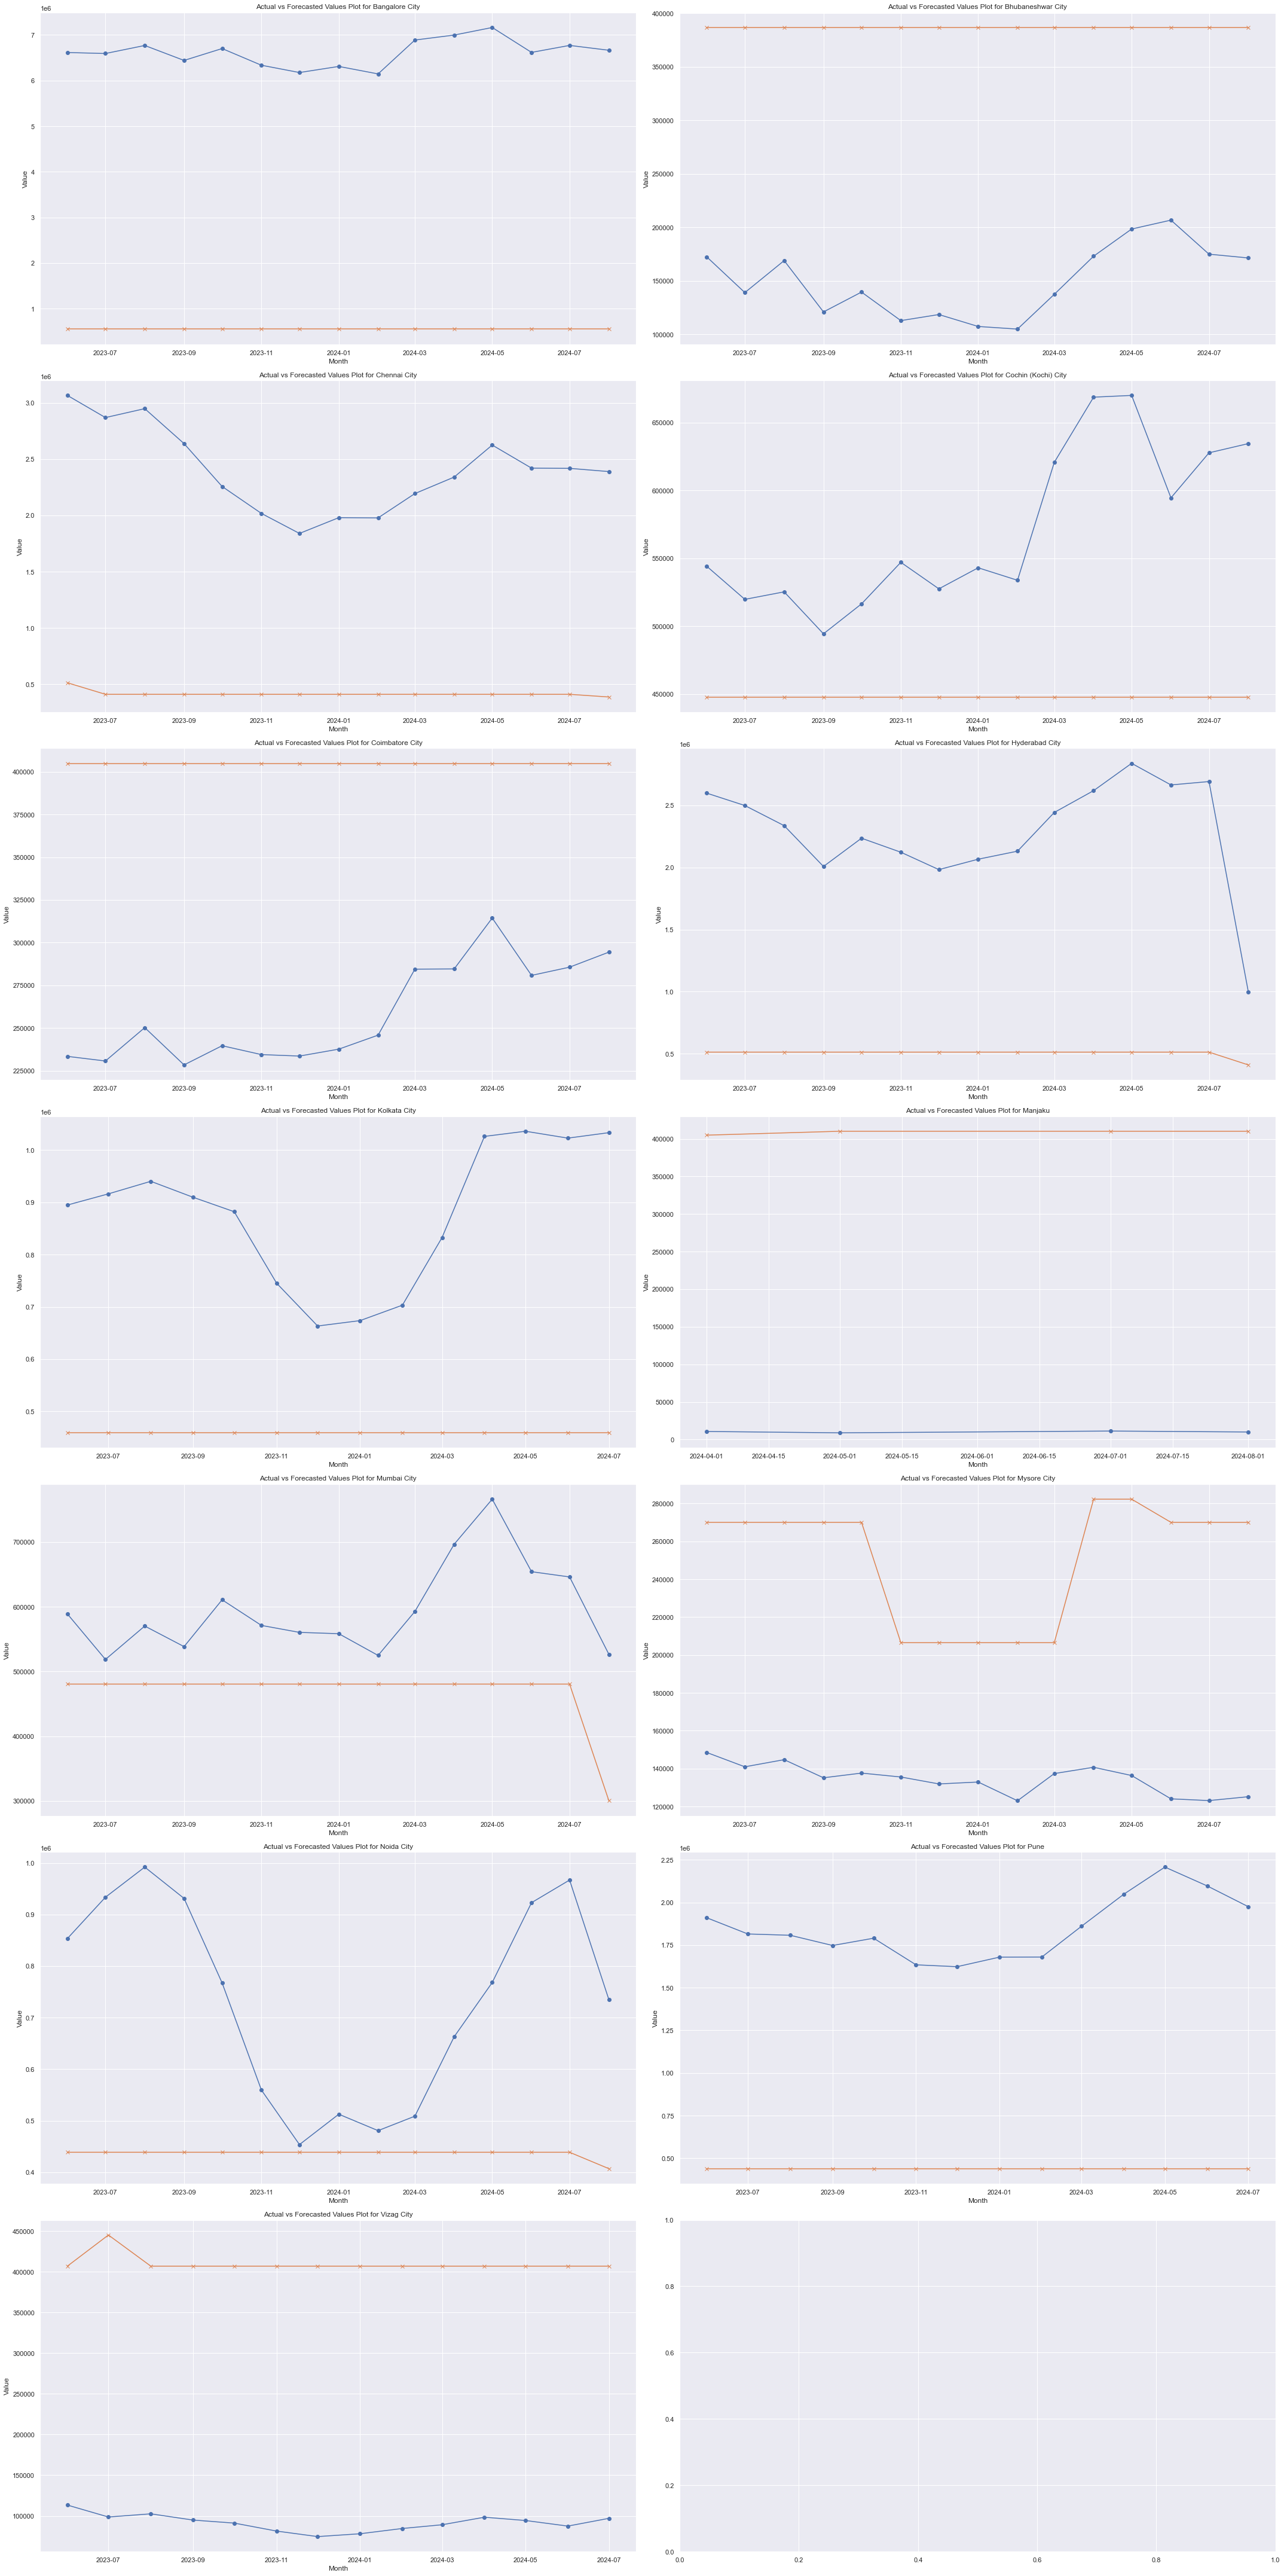

In [86]:
plot_results(y_test['Total Units (kWh)'], y_pred, x_test['City'], x_test['Date'])

In [87]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)

param_grid = {
    'max_depth': [3, 5, 10],
             'criterion':['squared_error','absolute_error'],
             'min_samples_split':[5,10,20],
             'min_samples_leaf':[5,10,20],
             'n_estimators':[50,100,150,200]
}

cv_val = 5 #setting cross validation
    

grid_search = GridSearchCV(model, param_grid, cv=cv_val, n_jobs=-1)

grid_search.fit(x_train.drop(columns=['City','Date']), y_train)

print(grid_search.best_params_)

{'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 5, 'n_estimators': 150}


In [88]:

mdl_best = grid_search.best_estimator_

y_pred = mdl_best.predict(x_test.drop(columns=['City','Date']))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.7537452098663969


In [33]:
pd.DataFrame(np.exp(y_pred))

,0
0,6114755.7924
1,6114755.7924
2,6114755.7924
3,6134528.1407
4,6114755.7924
...,...
176,80173.2829
177,80173.2829
178,80173.2829
179,80173.2829


In [34]:
np.exp(y_test)

,Total Units (kWh)
86,6615402.0000
87,6593446.0000
88,6769602.0000
89,6441802.6400
90,6702163.0000
...,...
1395,89134.0000
1396,98395.1000
1397,94357.9000
1398,87497.3000


In [89]:
pd.concat([np.exp(y_test).reset_index(),pd.DataFrame(np.exp(y_pred))],axis=1).to_csv("test output.csv")

In [90]:
importances = mdl_best.feature_importances_

# Create a dataframe to visualize feature importances
feature_importances = pd.DataFrame({'Feature': x_train.drop(columns=['City','Date']).columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importances)

                           Feature  Importance
4                Unique Site Count      0.7277
17                           City2      0.1767
0                  No of Employees      0.0487
2                       Sft Served      0.0237
1                      No of Seats      0.0117
8              wind_speed_10m_mean      0.0101
14    soil_moisture_0_to_10cm_mean      0.0011
5             Percentage Occupancy      0.0001
16       relative_humidity_2m_mean      0.0001
11               precipitation_sum      0.0001
7               temperature_2m_min      0.0000
10         shortwave_radiation_sum      0.0000
15  et0_fao_evapotranspiration_sum      0.0000
3              temperature_2m_mean      0.0000
6               temperature_2m_max      0.0000
12               dew_point_2m_mean      0.0000
13               pressure_msl_mean      0.0000
9                 cloud_cover_mean      0.0000


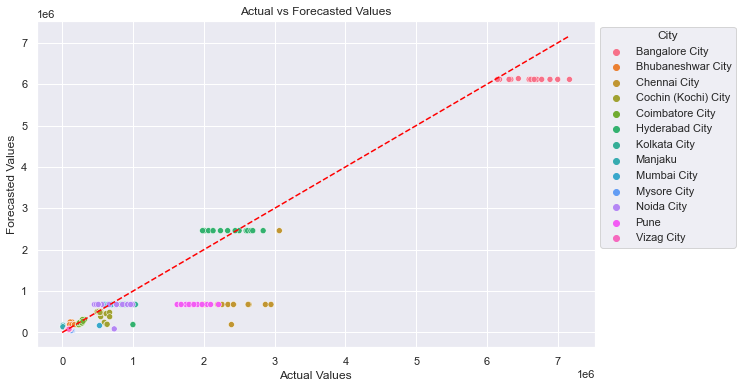

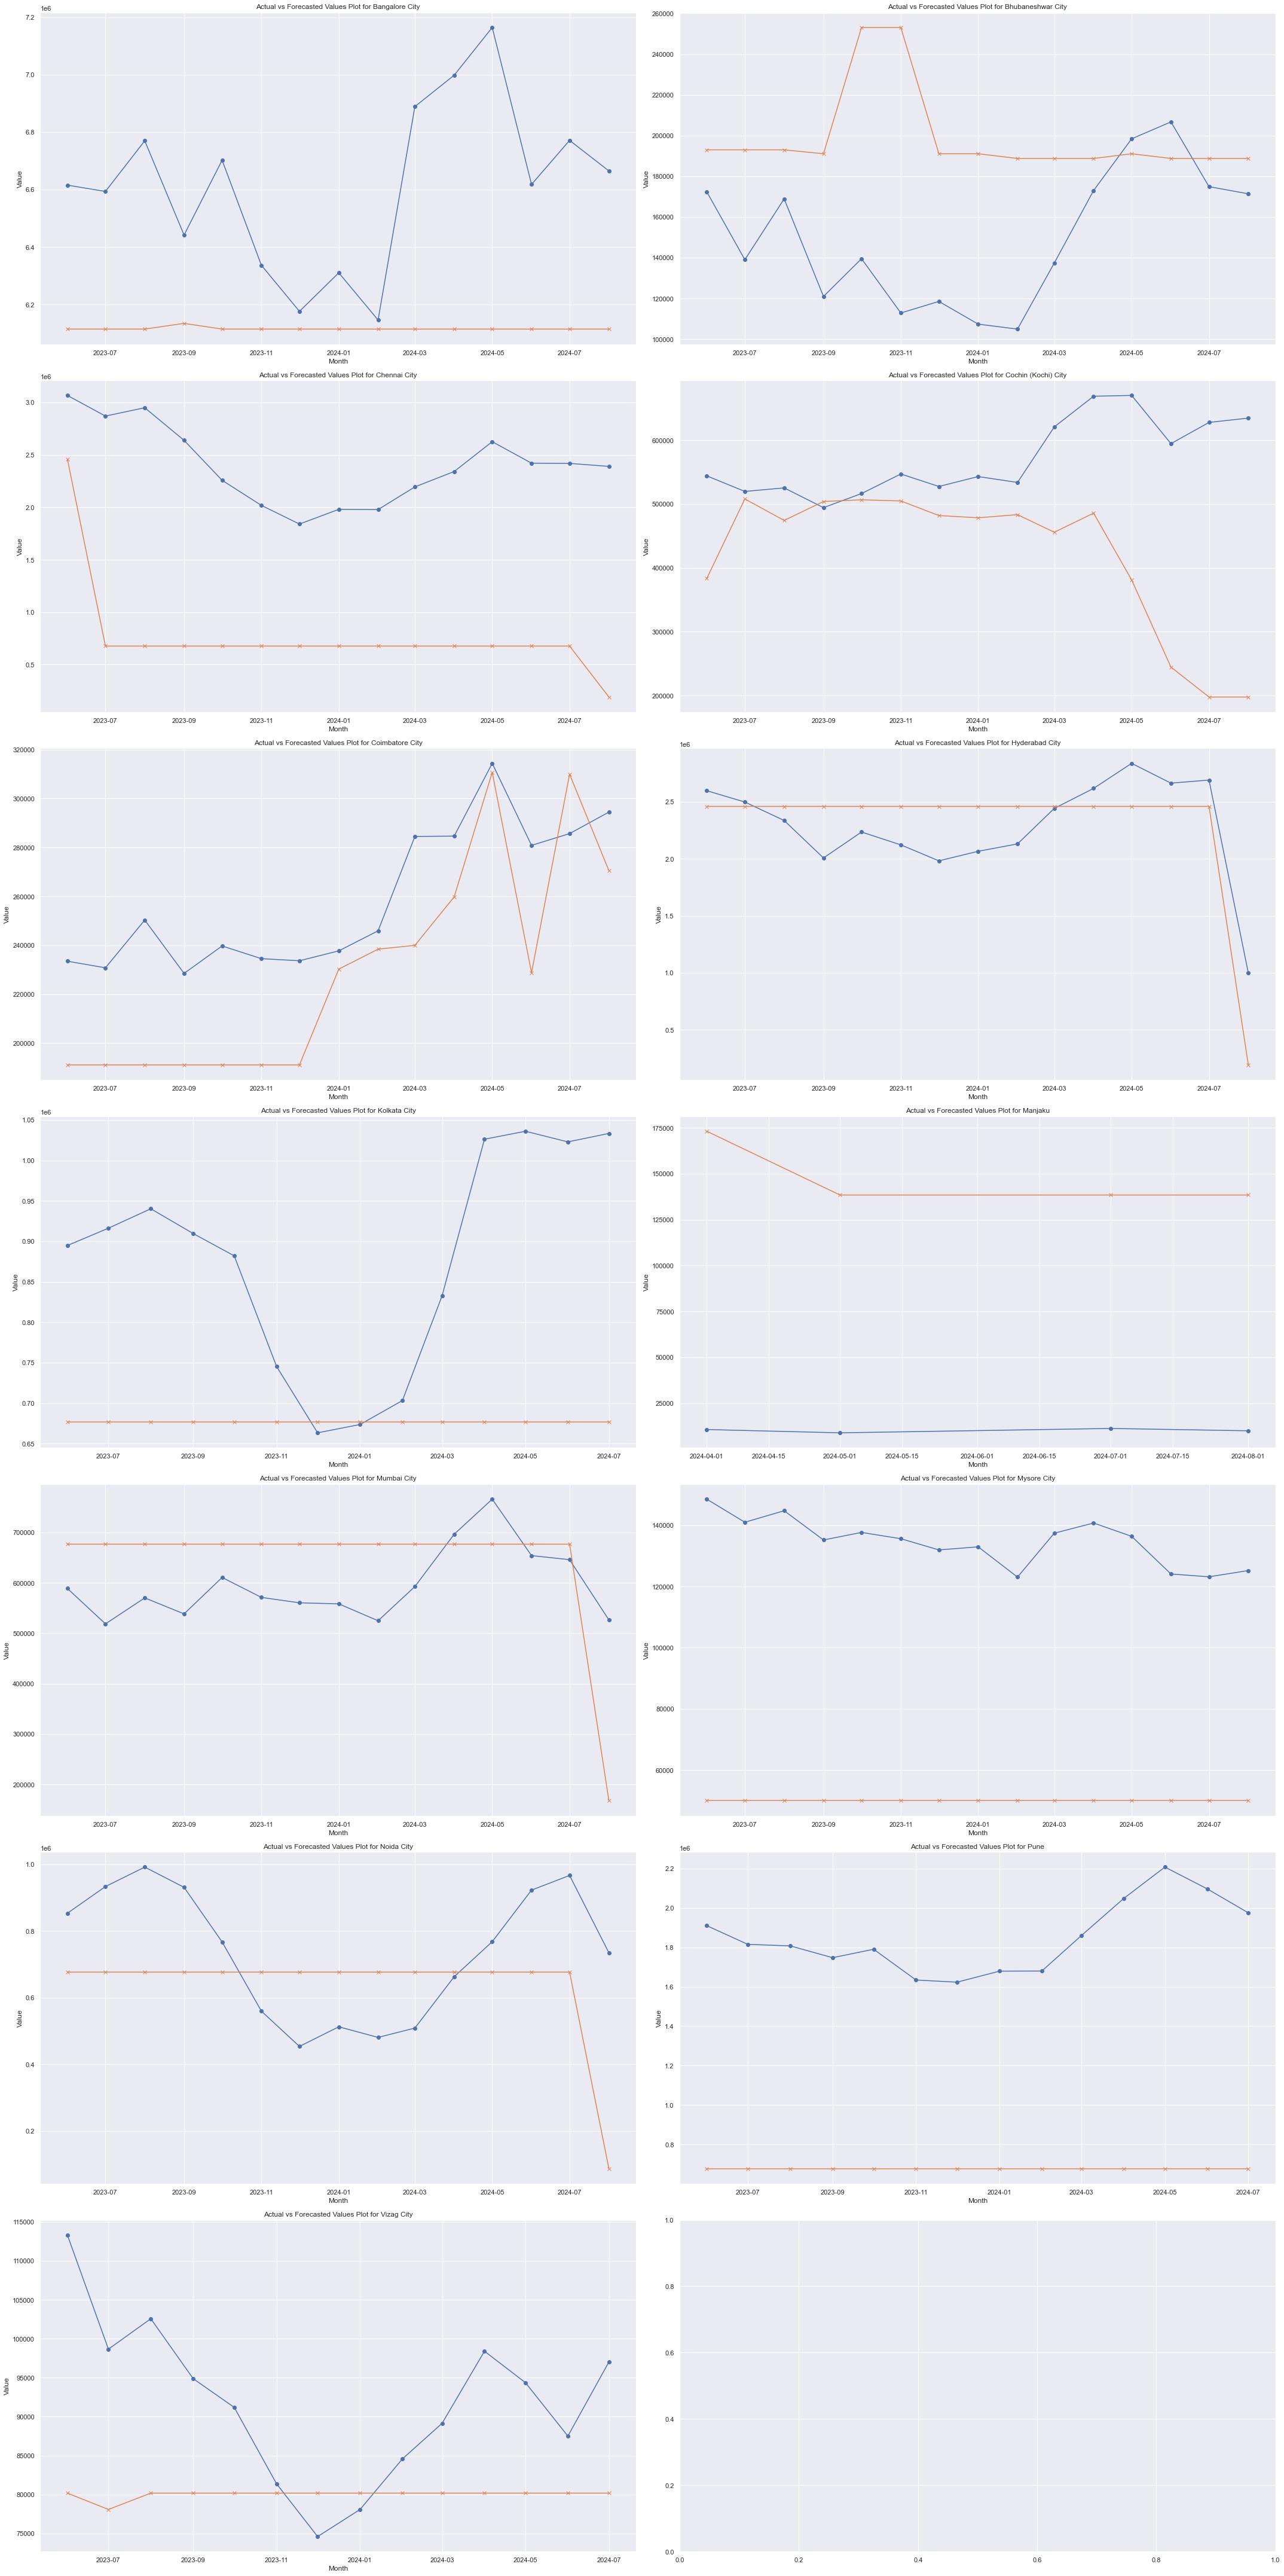

In [91]:
plot_results(y_test['Total Units (kWh)'], y_pred, x_test['City'], x_test['Date'])

# Try Neural Networks

In [92]:
from sklearn.neural_network import MLPRegressor

#param_grid = {
#    'hidden_layer_sizes': [(50,100,50), (10,25,15), (25,50,100,100,100,50,25)],
#    'activation': ['tanh', 'relu'],
#    'solver': ['sgd', 'adam'],
#    'alpha': [0.0001, 0.01, 0.05],
#    'learning_rate': ['constant','adaptive'],
#}

param_grid = {
    'hidden_layer_sizes': [(25,50,100,100,100,50,25),(25,50,100,100,100,100,100,50,25)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.00001],
    'learning_rate': ['constant'],
}

mlpmdl = MLPRegressor(random_state = 42, max_iter=10000)
grid_search = GridSearchCV(mlpmdl, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train.drop(columns=['City','Date']), y_train)


GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['tanh'], 'alpha': [0.0001, 1e-05],
                         'hidden_layer_sizes': [(25, 50, 100, 100, 100, 50, 25),
                                                (25, 50, 100, 100, 100, 100,
                                                 100, 50, 25)],
                         'learning_rate': ['constant'], 'solver': ['adam']},
             scoring='r2')

In [93]:
print(grid_search.best_params_)

{'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (25, 50, 100, 100, 100, 50, 25), 'learning_rate': 'constant', 'solver': 'adam'}


In [94]:
mdl_best = grid_search.best_estimator_

y_pred = mdl_best.predict(x_test.drop(columns=['City','Date']))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1.437010867450201


In [95]:
np.exp(rmse)

4.208098434749535

In [96]:
pd.DataFrame(np.exp(y_pred))

,0
0,433836.8285
1,433836.8909
2,433831.3958
3,433850.0487
4,433834.9363
...,...
176,433938.3179
177,433937.7324
178,433935.8045
179,433941.5035


In [97]:
np.exp(y_test)

,Total Units (kWh)
86,6615402.0000
87,6593446.0000
88,6769602.0000
89,6441802.6400
90,6702163.0000
...,...
1395,89134.0000
1396,98395.1000
1397,94357.9000
1398,87497.3000


In [98]:
pd.concat([np.exp(y_test).reset_index(),pd.DataFrame(np.exp(y_pred))],axis=1).to_csv("NNtest output.csv")

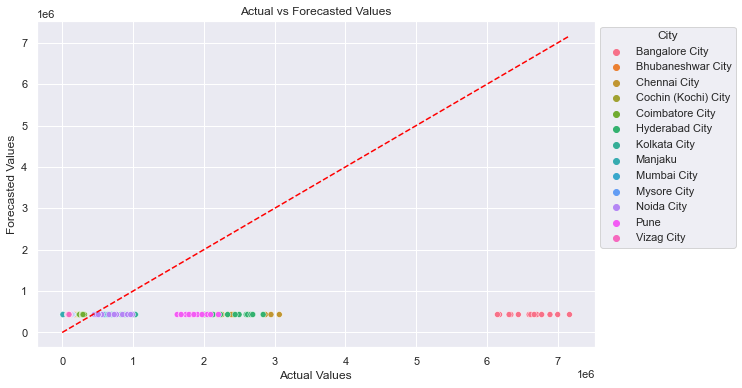

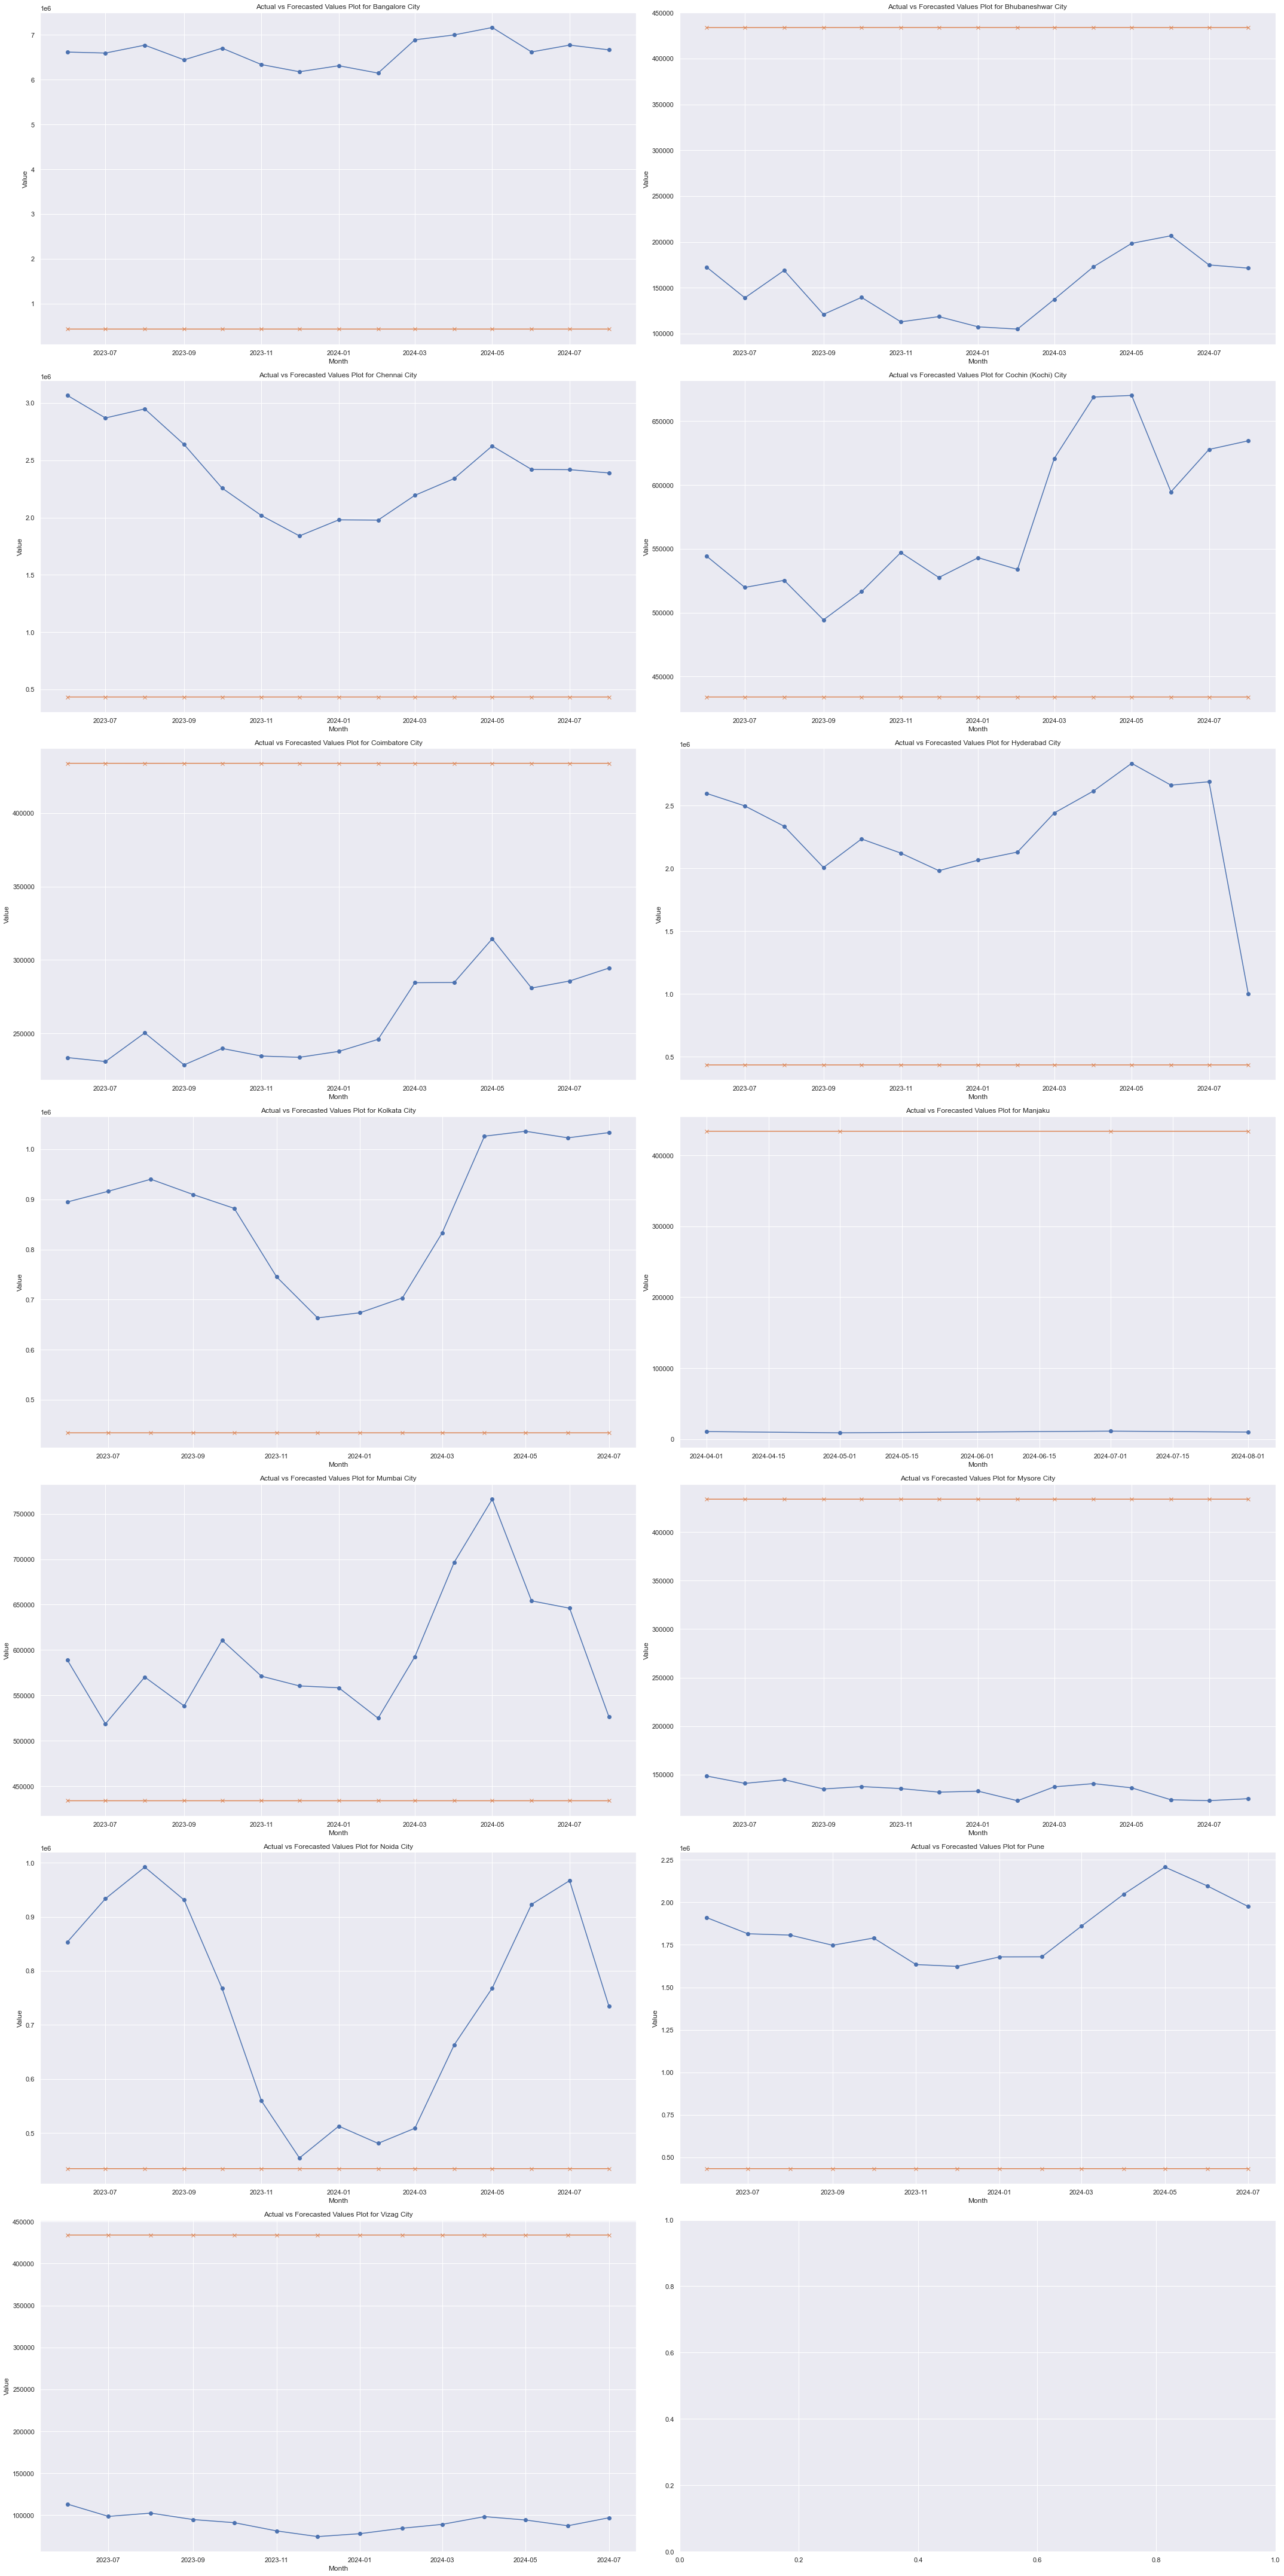

In [99]:
plot_results(y_test['Total Units (kWh)'], y_pred, x_test['City'], x_test['Date'])

# We will do LSTM Next

In [100]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
import seaborn as sns
sns.set()

In [101]:
x_train_t = x_train.drop(columns=['City','Date']).to_numpy()
x_test_t = x_test.drop(columns=['City','Date']).to_numpy()

In [102]:
x_train_arr = x_train_t.reshape((x_train_t.shape[0], 1, x_train_t.shape[1]))
x_test_arr = x_test_t.reshape((x_test_t.shape[0], 1, x_test_t.shape[1]))


In [103]:
# design network for confirmed cases data
model = Sequential()
model.add(LSTM(60, activation='relu',input_shape=(x_train_arr.shape[1], x_train_arr.shape[2])))

model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(x_train_arr, y_train, epochs=30, batch_size=50,  verbose=1, shuffle=False)

Epoch 1/30
25/25 [==============================] - 2s 4ms/step - loss: 12.8347
Epoch 2/30
25/25 [==============================] - 0s 3ms/step - loss: 11.9093
Epoch 3/30
25/25 [==============================] - 0s 4ms/step - loss: 10.0237
Epoch 4/30
25/25 [==============================] - 0s 2ms/step - loss: 6.6813
Epoch 5/30
25/25 [==============================] - 0s 2ms/step - loss: 4.6184
Epoch 6/30
25/25 [==============================] - 0s 2ms/step - loss: 3.8572
Epoch 7/30
25/25 [==============================] - 0s 3ms/step - loss: 3.3959
Epoch 8/30
25/25 [==============================] - 0s 3ms/step - loss: 2.8751
Epoch 9/30
25/25 [==============================] - 0s 3ms/step - loss: 2.4208
Epoch 10/30
25/25 [==============================] - 0s 4ms/step - loss: 2.1794
Epoch 11/30
25/25 [==============================] - 0s 5ms/step - loss: 2.0798
Epoch 12/30
25/25 [==============================] - 0s 4ms/step - loss: 2.0118
Epoch 13/30
25/25 [===========================

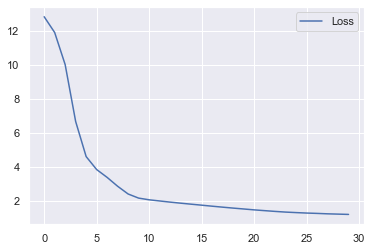

In [104]:
# plot history
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Plot history
plt.plot(history.history['loss'], label='Loss')

# Use ScalarFormatter to display the actual value instead of scientific notation
plt.gca().get_yaxis().set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Format with commas

# Add legend and show plot
plt.legend()
plt.show()

In [105]:
# make a prediction
y_pred=model.predict(x_test_arr)
# check length
y_pred.shape,y_test.shape

6/6 [==============================] - 0s 1ms/step


((181, 1), (181, 1))

In [106]:
pa=pd.DataFrame()
pa['Date']=x_test.reset_index().Date.iloc[1:]
pa['Prediction']=np.exp([i[0] for i in y_pred][1:])
pa['Actual Values']=np.exp(y_test[:-1].to_numpy())
pa.head()

,Date,Prediction,Actual Values
1,2023-07-01,14757404.0000,6615402.0000
2,2023-08-01,16791240.0000,6593446.0000
3,2023-09-01,68945192.0000,6769602.0000
4,2023-10-01,15782185.0000,6441802.6400
5,2023-11-01,8253063.0000,6702163.0000


In [107]:
pa.to_csv('LSTM output.csv')

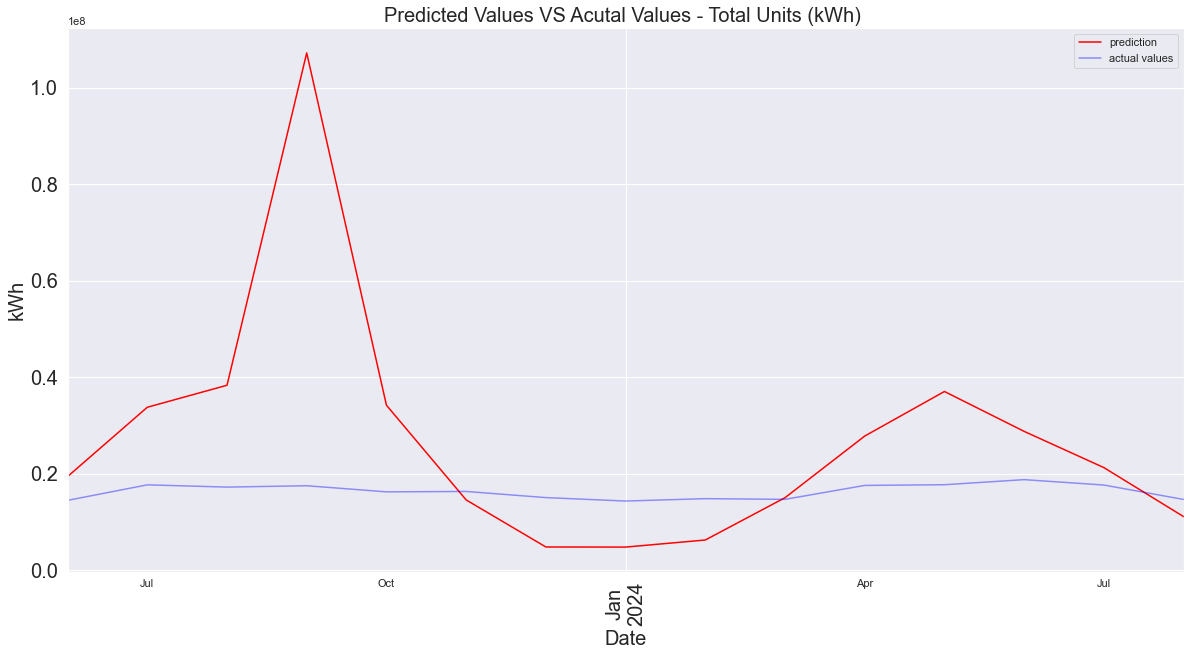

In [108]:
plt.figure(figsize=(20,10))
pa.groupby('Date')['Prediction'].sum().plot(kind='line',label='prediction',color='red',alpha=1)
pa.groupby("Date")['Actual Values'].sum().plot(kind='line',label='actual values',color='blue',alpha=0.4)
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)

plt.ylabel('kWh',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.title('Predicted Values VS Acutal Values - Total Units (kWh) ',fontsize=20)
plt.legend()

In [109]:
from sklearn.metrics import mean_squared_error
def RMSE(actual,prediction):
    rmse = np.sqrt(mean_squared_error(actual,prediction))
    return rmse

print(RMSE(y_test[:-1],[i[0] for i in y_pred][1:]))

1.4626708584269015


# Next we will do some CNN

In [169]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data.iloc[i:i+seq_length].values
        y = data.iloc[i+seq_length]['Total Units (kWh)']
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Example: Load your time series data into a pandas DataFrame
#data = pd.read_csv('your_time_series_data.csv')
# Assuming 'value' is the column with the time series data
SEQ_LENGTH = 10

X, y = create_sequences(new_data.drop(columns=['City','Date']), SEQ_LENGTH)



In [170]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [171]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten

model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(SEQ_LENGTH, X_train.shape[2])),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Reshape data for the CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
35/35 [==============================] - 1s 4ms/step - loss: 1248473120768.0000 - val_loss: 620762300416.0000
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 528337174528.0000 - val_loss: 494991278080.0000
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 443536769024.0000 - val_loss: 425691938816.0000
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 427212111872.0000 - val_loss: 435570442240.0000
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 441862619136.0000 - val_loss: 451993534464.0000
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 373179482112.0000 - val_loss: 354540027904.0000
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 356750917632.0000 - val_loss: 316293611520.0000
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 362219044864.0000 - val_loss: 311571480576.0000
Epoch 9/100
35/35 [============

In [172]:
predictions = model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [173]:
pd.DataFrame(predictions, y_test).head(10)

,0
124300.0000,169076.5000
123630.0000,123260.2031
2280838.0000,3797648.5000
2838030.0000,2328393.5000
2497159.0000,1578322.2500
2657979.0000,2540129.2500
107399.0000,83119.8438
232420.0000,156147.1094
581653.0000,504211.0625
135600.0000,129241.1328


In [174]:
pd.DataFrame(predictions,y_test).to_csv('CNN Output.csv')

In [175]:
rmse = np.sqrt(mean_squared_error(y_test.flatten(), predictions.flatten()))
np.log(rmse)

13.34316236451325

In [176]:
X_test.shape

(278, 10, 18)

In [177]:
cnn_df = pd.DataFrame({'Actuals':y_test.flatten(), 'Forecasted':predictions.flatten()})

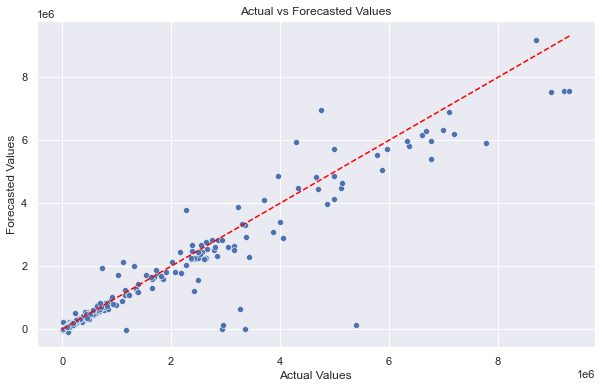

In [178]:
#Test visualization for this alone.. need to add in City etc. later.  

plt.figure(figsize=(10, 6))

# Scatter plot
#df =
ax = sns.scatterplot(x='Actuals', y='Forecasted', data=cnn_df)
#sns.lineplot(x=[df['actual'].min(), df['actual'].max()], y=[df['actual'].min(), df['actual'].max()], color='red')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.plot([0, cnn_df["Actuals"].max()], 
         [0, cnn_df["Actuals"].max()], color="red", linestyle="--")
plt.title('Actual vs Forecasted Values')
plt.xlabel('Actual Values')
plt.ylabel('Forecasted Values')
plt.show()

# Try out ARIMA for Bangalore location

In [134]:
#Delete all rows other than Bangalore. We will now read it back

data = pd.read_csv('Modified Data.csv', parse_dates=['Date'], index_col='Date')


In [135]:
print(data.head())

            Unnamed: 0            City  Total Units (kWh)  No of Employees  \
Date                                                                         
2016-04-01           0  Bangalore City      13692746.0000           0.0000   
2016-05-01           1  Bangalore City      14002351.0000           0.0000   
2016-06-01           2  Bangalore City      13707484.0000           0.0000   
2016-07-01           3  Bangalore City      13261070.0000           0.0000   
2016-08-01           4  Bangalore City      12636357.0000           0.0000   

            No of Seats  Sft Served  temperature_2m_mean  Unique Site Count  \
Date                                                                          
2016-04-01       0.0000      0.0000               0.5736                  8   
2016-05-01       0.0000      0.0000               0.5007                  8   
2016-06-01       0.0000      0.0000               0.4124                  8   
2016-07-01       0.0000      0.0000               0.4017  

In [131]:
#data = data.asfreq('M')


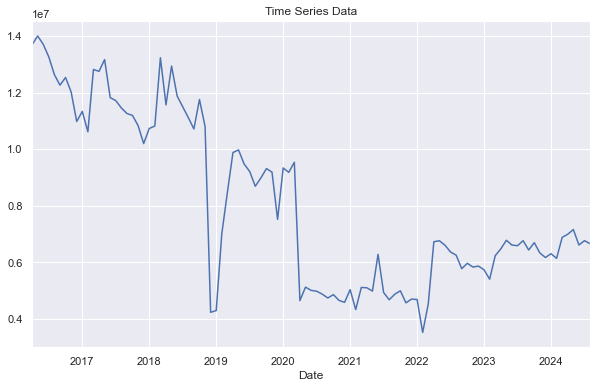

In [136]:
data['Total Units (kWh)'].plot(figsize=(10, 6))
plt.title('Time Series Data')
plt.show()

In [137]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Define the ARIMA model
arima_model = ARIMA(data['Total Units (kWh)'], order=(5, 1, 0))

# Fit the model
arima_result = arima_model.fit()

# Print the summary of the model
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:      Total Units (kWh)   No. Observations:                  101
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1532.537
Date:                Sun, 29 Sep 2024   AIC                           3077.074
Time:                        19:30:50   BIC                           3092.705
Sample:                    04-01-2016   HQIC                          3083.400
                         - 08-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0389      0.104     -0.373      0.709      -0.243       0.165
ar.L2         -0.0776      0.073     -1.059      0.289      -0.221       0.066
ar.L3         -0.1190      0.065     -1.831      0.0

C:\Users\nat_a\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nat_a\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nat_a\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [150]:
# Forecast the next 10 periods
arima_forecast = arima_result.forecast(steps=12)
print(arima_forecast)


2024-09-01   6710538.8467
2024-10-01   6717145.3577
2024-11-01   6739204.0278
2024-12-01   6731518.3909
2025-01-01   6731180.1146
2025-02-01   6727186.7432
2025-03-01   6727050.3372
2025-04-01   6726938.2939
2025-05-01   6727726.4477
2025-06-01   6727912.2281
2025-07-01   6728010.2942
2025-08-01   6727908.3436
Freq: MS, Name: predicted_mean, dtype: float64


In [139]:
# Define the SARIMA model
sarima_model = SARIMAX(data['Total Units (kWh)'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model
sarima_result = sarima_model.fit()

# Print the summary of the model
print(sarima_result.summary())


C:\Users\nat_a\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nat_a\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                  Total Units (kWh)   No. Observations:                  101
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1364.116
Date:                            Sun, 29 Sep 2024   AIC                           2738.233
Time:                                    19:31:02   BIC                           2750.619
Sample:                                04-01-2016   HQIC                          2743.223
                                     - 08-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7409      0.722      1.026      0.305      -0.674       2.156
ma.L1         -0.7984      0.658   

In [144]:
# Forecast the next 10 periods
sarima_forecast = sarima_result.get_forecast(steps=100)
sarima_forecast_df = sarima_forecast.conf_int()
sarima_forecast_df['forecast'] = sarima_forecast.predicted_mean
print(sarima_forecast_df['forecast'])


2024-09-01    6450731.5760
2024-10-01    6716608.6879
2024-11-01    6393527.4116
2024-12-01    5840565.3070
2025-01-01    6086495.0085
                  ...     
2032-08-01   10376925.7504
2032-09-01   10208817.3068
2032-10-01   10458684.8106
2032-11-01   10148193.9614
2032-12-01    9334617.8749
Freq: MS, Name: forecast, Length: 100, dtype: float64


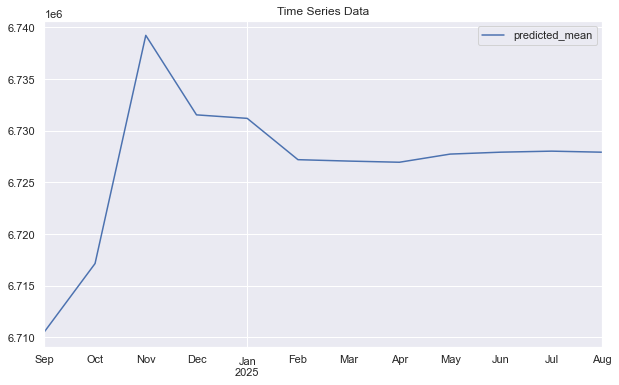

In [151]:
pd.DataFrame(arima_forecast).plot(figsize=(10, 6))
plt.title('Time Series Data')
plt.show()

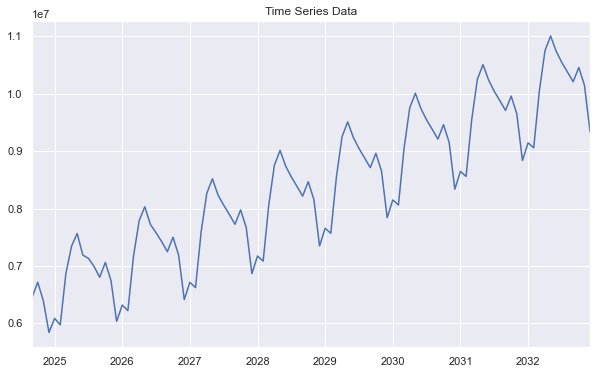

In [145]:
sarima_forecast_df['forecast'].plot(figsize=(10, 6))
plt.title('Time Series Data')
plt.show()

# LSTM Version 2 - Same code for splitting data as above in CNN

In [179]:
model = Sequential([
    LSTM(100, activation='relu', input_shape=(SEQ_LENGTH, X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
35/35 [==============================] - 1s 8ms/step - loss: 1610049650688.0000 - val_loss: 832437354496.0000
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 656164257792.0000 - val_loss: 634927316992.0000
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 627544555520.0000 - val_loss: 472478023680.0000
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 568087085056.0000 - val_loss: 635331674112.0000
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 534002597888.0000 - val_loss: 610246197248.0000
Epoch 6/100
35/35 [==============================] - 0s 5ms/step - loss: 615128825856.0000 - val_loss: 646712000512.0000
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: 712190263296.0000 - val_loss: 920654839808.0000
Epoch 8/100
35/35 [==============================] - 0s 5ms/step - loss: 702817632256.0000 - val_loss: 697715195904.0000
Epoch 9/100
35/35 [============

In [180]:
predictions = model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [182]:
pd.DataFrame(predictions, y_test).head(10)

,0
124300.0000,170137.2188
123630.0000,118155.3438
2280838.0000,3722940.5000
2838030.0000,2235751.2500
2497159.0000,3170085.0000
2657979.0000,2685965.5000
107399.0000,73401.6328
232420.0000,178002.1094
581653.0000,578844.3125
135600.0000,136664.0781


In [163]:
pred_arr = predictions.flatten()

In [164]:
pred_arr.shape

(278,)

In [172]:
X_test

array([[[1.52160000e+05, 0.00000000e+00, 5.75763832e-03, ...,
         1.61160965e-01, 2.60798913e-01, 4.67672779e-01],
        [1.35040000e+05, 0.00000000e+00, 5.75763832e-03, ...,
         2.16879250e-01, 1.34088825e-01, 6.28836286e-01],
        [1.79590000e+05, 0.00000000e+00, 5.75763832e-03, ...,
         1.90080147e-01, 7.86435245e-01, 1.26410084e-01],
        ...,
        [2.15574000e+05, 0.00000000e+00, 5.75763832e-03, ...,
         3.96422212e-01, 4.49254481e-01, 7.20941080e-01],
        [1.97567000e+05, 0.00000000e+00, 5.75763832e-03, ...,
         3.70904060e-01, 3.68664605e-01, 8.25229318e-01],
        [1.39569000e+05, 0.00000000e+00, 5.75763832e-03, ...,
         3.68845391e-01, 2.23545653e-01, 9.17668253e-01]],

       [[1.00320000e+05, 1.53572874e-02, 5.87395425e-03, ...,
         4.89896752e-01, 2.37861871e-01, 8.78159315e-01],
        [8.81900000e+04, 1.53572874e-02, 5.87395425e-03, ...,
         3.29524087e-01, 2.39345399e-01, 7.35000989e-01],
        [8.17900000e+04, 

In [183]:
lstm_df = pd.DataFrame({'Actuals':y_test.flatten(), 'Forecasted':predictions.flatten()})



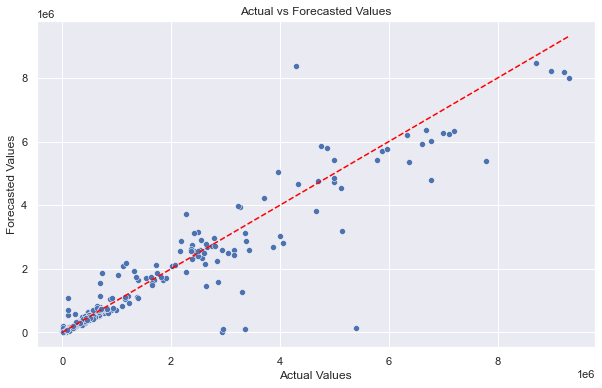

In [184]:
#Test visualization for this alone.. need to add in City etc. later.  

plt.figure(figsize=(10, 6))

# Scatter plot
#df =
ax = sns.scatterplot(x='Actuals', y='Forecasted', data=lstm_df)
#sns.lineplot(x=[df['actual'].min(), df['actual'].max()], y=[df['actual'].min(), df['actual'].max()], color='red')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.plot([0, lstm_df["Actuals"].max()], 
         [0, lstm_df["Actuals"].max()], color="red", linestyle="--")
plt.title('Actual vs Forecasted Values')
plt.xlabel('Actual Values')
plt.ylabel('Forecasted Values')
plt.show()